In [6]:
from utils import *
from transform import *

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loaded_data=pd.read_csv("data/movie_dataset/movie_dataset_total.csv")
loaded_data.head()

,Unnamed: 0,mid,sid,movie_id,genre,rating,plot_synopsis_len,plot_synopsis_cvt,segment_token_len,segment,...,consequence,SICA,A,IA,CA,SIA,SCA,ICA,label,split
0,0,0,0,tt0105112,"['Action', 'Thriller']",6.9,1492,1492,51,"[Jack] [Ryan] is on a ""working vacation"" in Lo...",...,not exist,0.999857,0.544908,0.002441,0.999987,0.003248,0.999941,0.999894,1,train
1,1,0,0,tt0105112,"['Action', 'Thriller']",6.9,1492,1492,51,"[Jack] [Ryan] is on a ""working vacation"" in Lo...",...,not exist,0.999874,0.999676,0.999399,0.999767,0.998795,0.999970,0.999967,1,train
2,2,0,0,tt0105112,"['Action', 'Thriller']",6.9,1492,1492,51,"[Jack] [Ryan] is on a ""working vacation"" in Lo...",...,The consequence of [mask] delivering the lect...,0.999950,0.855744,0.005276,0.999997,0.990353,0.999987,0.999915,1,train
3,3,0,0,tt0105112,"['Action', 'Thriller']",6.9,1492,1492,51,"[Jack] [Ryan] is on a ""working vacation"" in Lo...",...,not exist,0.999667,0.980863,0.000751,0.999845,0.004075,0.999872,0.999930,1,train
4,4,0,0,tt0105112,"['Action', 'Thriller']",6.9,1492,1492,51,"[Jack] [Ryan] is on a ""working vacation"" in Lo...",...,not exist,0.760265,0.106830,0.803714,0.959429,0.159387,0.849080,0.872121,-1,train


In [4]:
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127301 entries, 0 to 127300
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         127301 non-null  int64  
 1   mid                127301 non-null  int64  
 2   sid                127301 non-null  int64  
 3   movie_id           127301 non-null  object 
 4   genre              127301 non-null  object 
 5   rating             127301 non-null  float64
 6   plot_synopsis_len  127301 non-null  int64  
 7   plot_synopsis_cvt  127301 non-null  int64  
 8   segment_token_len  127301 non-null  int64  
 9   segment            127301 non-null  object 
 10  segment_char       127300 non-null  object 
 11  action             127301 non-null  object 
 12  intention          127301 non-null  object 
 13  situation          127301 non-null  object 
 14  consequence        127301 non-null  object 
 15  SICA               127301 non-null  float64
 16  A 

## 1. CharMoral Label Distribution

/tmp/ipykernel_250144/3234709002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


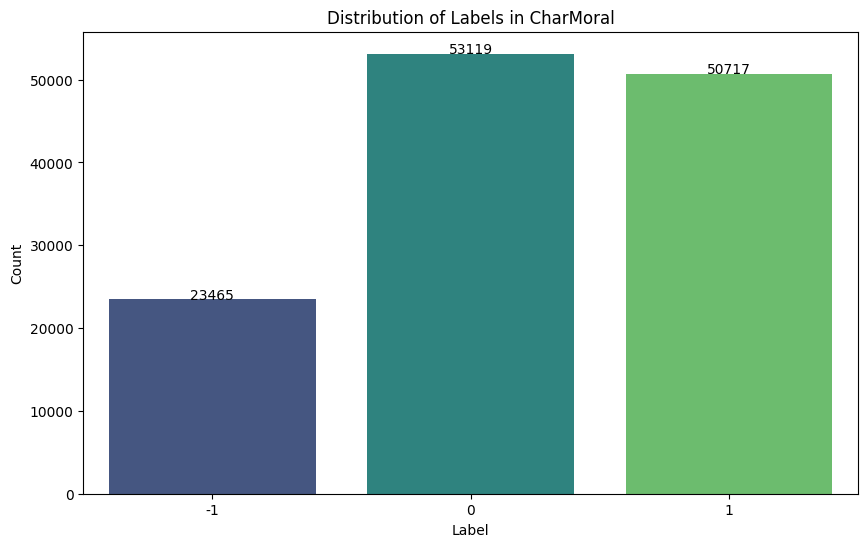

In [7]:
# Count the occurrences of each label
label_counts = loaded_data['label'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# Add y-axis values on the bars
for index, value in enumerate(label_counts.values):
    barplot.text(index, value, str(value), color='black', ha="center")

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in CharMoral')
plt.show()

## 2. Segment Distribution

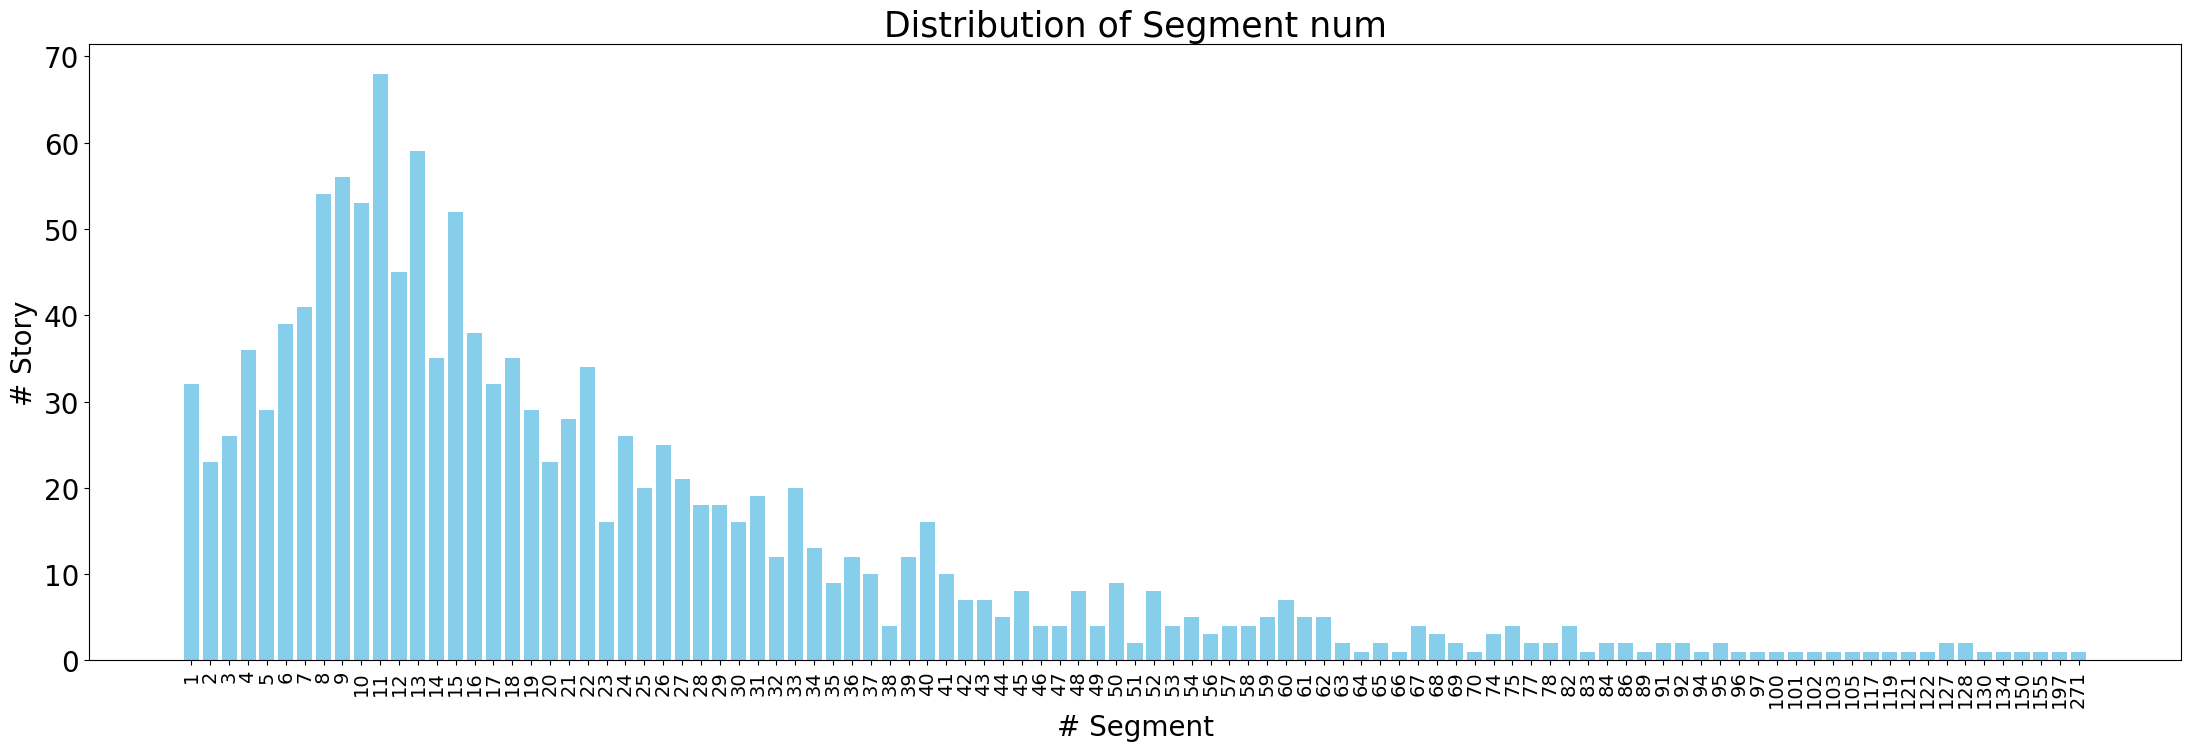

In [15]:
from collections import Counter

dataset=load_pickle('data/preprocessed/movie_synopsis_segments_n3.pickle')
seg_list=[]
for i in range(len(dataset)):
    tmp=len(dataset[i]['segments'])
    seg_list.append(tmp)

seg_dict=Counter(seg_list)

sorted_score_data = {str(k): v for k, v in sorted(seg_dict.items())}

scores = list(sorted_score_data.keys()) # len
frequencies = list(sorted_score_data.values()) # count 

plt.figure(figsize=(27, 8))
plt.bar(scores, frequencies, color='skyblue')

plt.title('Distribution of Segment num', fontsize=25)
plt.xlabel('# Segment', fontsize=20)
plt.ylabel('# Story', fontsize=20)

plt.xticks(scores, rotation=90, fontsize=14)
plt.yticks(fontsize=20)

plt.show()


## 3. Rate Distribution

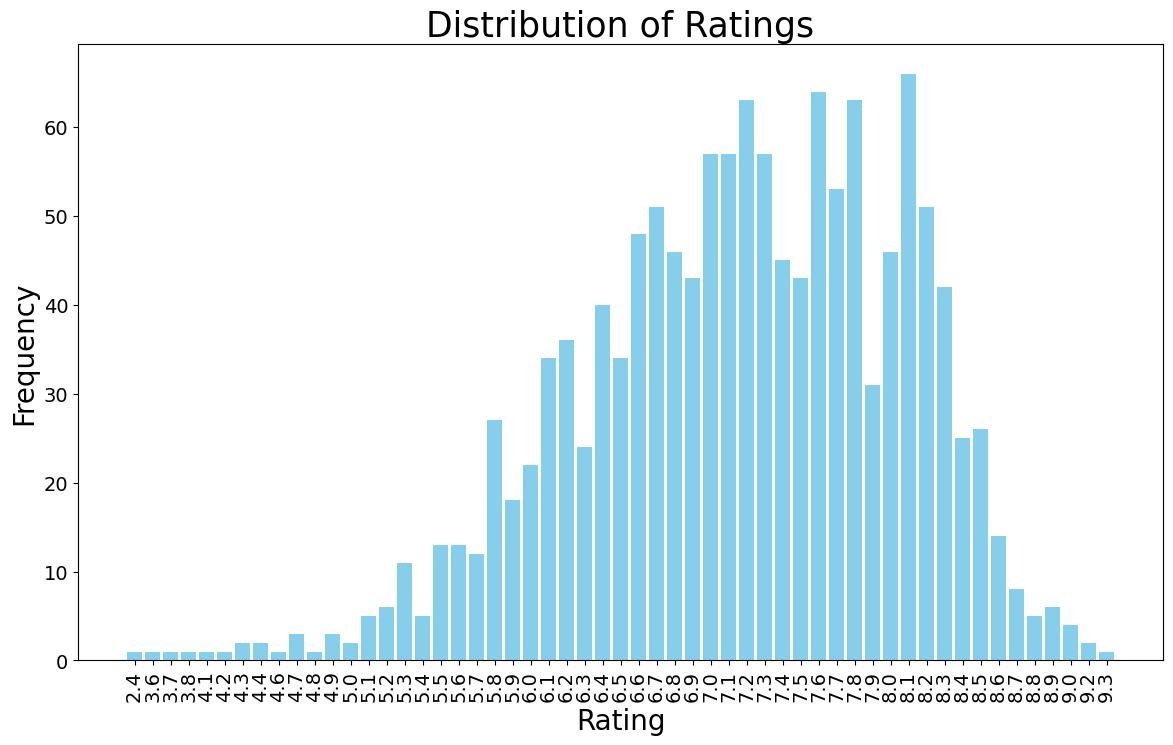

In [19]:
rate_list=[]
for i in range(len(dataset)):
    tmp=dataset[i]['rating']
    rate_list.append(tmp)

rate_dict=Counter(rate_list)


sorted_score_data = {str(k): v for k, v in sorted(rate_dict.items())}

scores = list(sorted_score_data.keys())
frequencies = list(sorted_score_data.values())

plt.figure(figsize=(14, 8))
plt.bar(scores, frequencies, color='skyblue')

plt.title('Distribution of Ratings', fontsize=25)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.xticks(scores, rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## 4. Genre Distribution

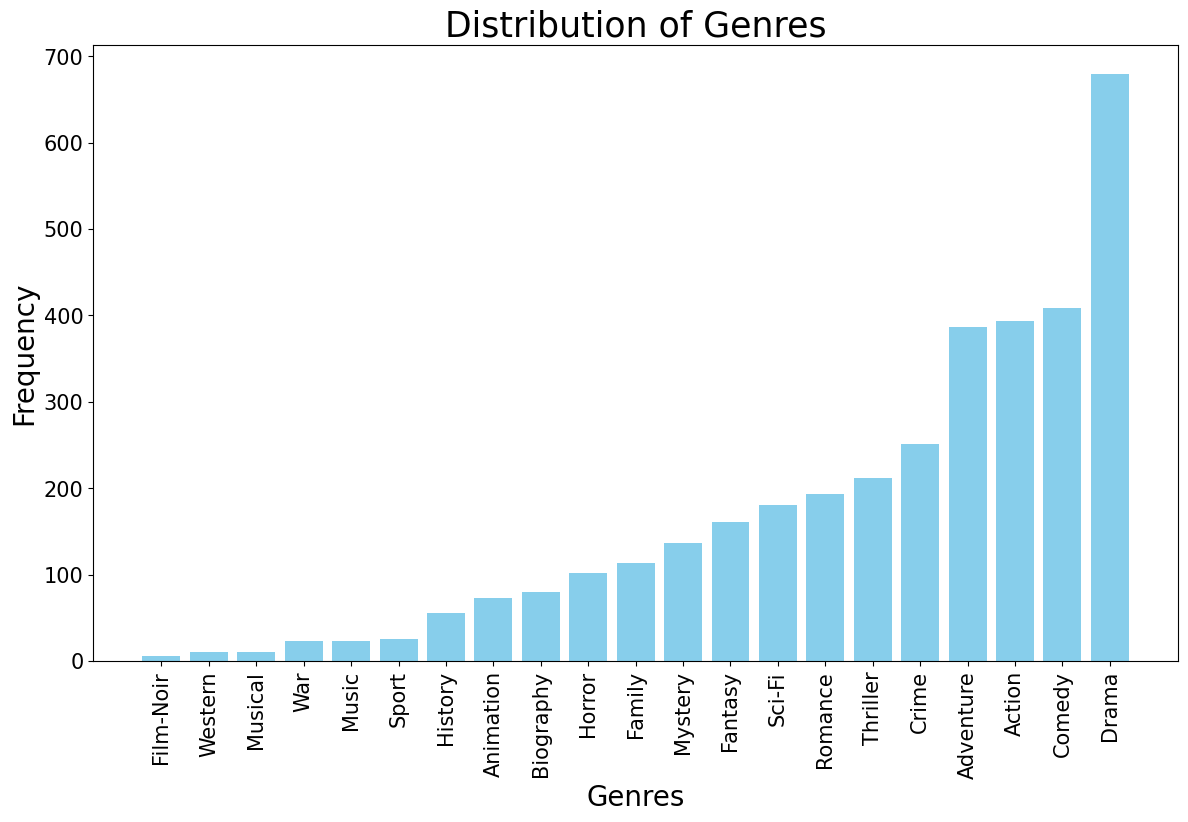

In [20]:
genre_list=[]
for i in range(len(dataset)):
    tmp=dataset[i]['genre']
    genre_list.extend(tmp)

genre_dict=Counter(genre_list)


sorted_genre_data = dict(sorted(genre_dict.items(), key=lambda item: item[1]))

genres = list(sorted_genre_data.keys())
frequencies = list(sorted_genre_data.values())

plt.figure(figsize=(14, 8))
plt.bar(genres, frequencies, color='skyblue')

plt.title('Distribution of Genres', fontsize=25)
plt.xlabel('Genres', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

plt.xticks(genres, rotation=90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()